In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import sys
from time import sleep

In [2]:
root_dir = Path().cwd().parent
sys.path.append(os.path.abspath(root_dir))
print(root_dir)

/app/SportsClassification


In [3]:
project_name = "sports_cv_project_classification"
experiment_name = "vgg13-paper-heavy-augmentations-exponential_lr"

In [4]:
def get_data(project_name: str, experiment_name: str) -> pd.DataFrame | pd.Series:
    df = pd.read_json(os.path.join(root_dir, "logs", project_name, experiment_name, "metrics.json"), lines=True)
    df = df[["epoch", "dataset", "epoch_loss", "epoch_accuracy", "epoch_top-5-accuracy"]].dropna().reset_index(drop=True)
    return df

In [5]:
get_data(project_name=project_name, experiment_name=experiment_name).head()

,epoch,dataset,epoch_loss,epoch_accuracy,epoch_top-5-accuracy
0,0,train,2.461553,0.409787,0.694324
1,0,val,1.005974,0.734000,0.938000


In [6]:
def draw_plot(df: pd.DataFrame | pd.Series, metric: str, title: str, ax = None):
    sns.lineplot(data=df, x="epoch", y=metric, hue="dataset", ax=ax)
    if ax:
        ax.set_title(title)
        if "loss" in metric:
            ax.set_yscale("log")
        elif "top-5-accuracy" in metric:
            ax.set_ylim(0.8, 1)
        elif "accuracy" in metric:
            ax.set_ylim(0.5, 1)
        ax.grid(True)

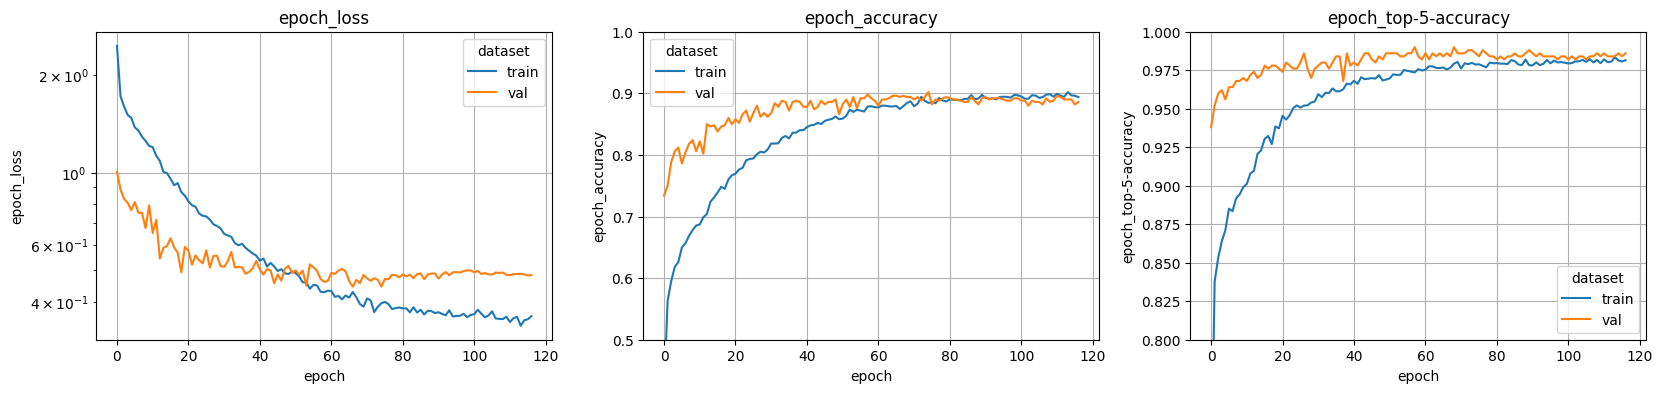

KeyboardInterrupt: 

In [7]:
while True:
    clear_output(wait=True)
    df = get_data(project_name=project_name, experiment_name=experiment_name)

    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    axs = axs.flatten()
    for i, metric in enumerate(df.columns[df.columns.str.startswith("epoch_")]):
        draw_plot(df, metric, metric, axs[i])

    plt.show()
    sleep(5)